In [1]:
#Run one time ONLY
"""from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("/content/sample_data/House Price Prediction/archive.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall(
        path="/content/sample_data/House Price Prediction")"""

'from zipfile import ZipFile\n\n# loading the temp.zip and creating a zip object\nwith ZipFile("/content/sample_data/House Price Prediction/archive.zip", \'r\') as zObject:\n\n    # Extracting all the members of the zip\n    # into a specific location.\n    zObject.extractall(\n        path="/content/sample_data/House Price Prediction")'

# Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_rows', 200)
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/House Price Prediction/data.csv")

#### Step-1: Data Understanding


*   DataFrame shape
*   Head and Tail


*   dtypes
*   describe





In [4]:
dataset.shape

(4600, 18)

In [5]:
dataset.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
dataset.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [7]:
dataset.dtypes

,0
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


In [8]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### Step-2: Data Preparation


*   Check missing values
*   Check duplicates




*   Prepare the date column


*   Feature creation








In [9]:
dataset.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [10]:
dataset.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [11]:
dataset.duplicated().sum()

0

In [12]:
dataset.loc[0, 'date']

'2014-05-02 00:00:00'

In [13]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [14]:
dataset.loc[0, 'date'].day_name()

'Friday'

In [15]:
dataset['date']

,date
0,2014-05-02
1,2014-05-02
2,2014-05-02
3,2014-05-02
4,2014-05-02
...,...
4595,2014-07-09
4596,2014-07-09
4597,2014-07-09
4598,2014-07-10


In [16]:
dataset['DayOfWeek'] = dataset['date'].dt.day_name()

In [17]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,DayOfWeek
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,Friday
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,Friday
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,Friday
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,Friday
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,Friday


In [18]:
dataset['date'].min()

Timestamp('2014-05-02 00:00:00')

In [19]:
dataset['date'].max()

Timestamp('2014-07-10 00:00:00')

In [20]:
dataset['date'].max() - dataset['date'].min()

Timedelta('69 days 00:00:00')

In [21]:
dataset.set_index('date', inplace=True)

In [22]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,DayOfWeek
date,,,,,,,,,,,,,,,,,,
2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,Friday
2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,Friday
2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,Friday
2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,Friday
2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,Friday


In [23]:
dataset.loc['2014-05']['price'].max()

3710000.0

In [24]:
dataset.loc['2014-05']['price'].mean()

533822.8377678694

In [25]:
dataset.loc['2014-06']['price'].max()

12899000.0

In [26]:
dataset.loc['2014-06']['price'].mean()

547968.1799094832

In [27]:
dataset.loc['2014-07']['price'].max()

26590000.0

In [28]:
dataset.loc['2014-07']['price'].mean()

614407.8189593077

In [29]:
dataset['price'].resample('D').max()

,price
date,
2014-05-02,2384000.0
2014-05-03,625000.0
2014-05-04,783500.0
2014-05-05,2280000.0
2014-05-06,1870000.0
...,...
2014-07-06,1280000.0
2014-07-07,1636000.0
2014-07-08,2458000.0


In [30]:
%matplotlib inline

In [31]:
highest_price = dataset['price'].resample('D').max()

<Axes: xlabel='date'>

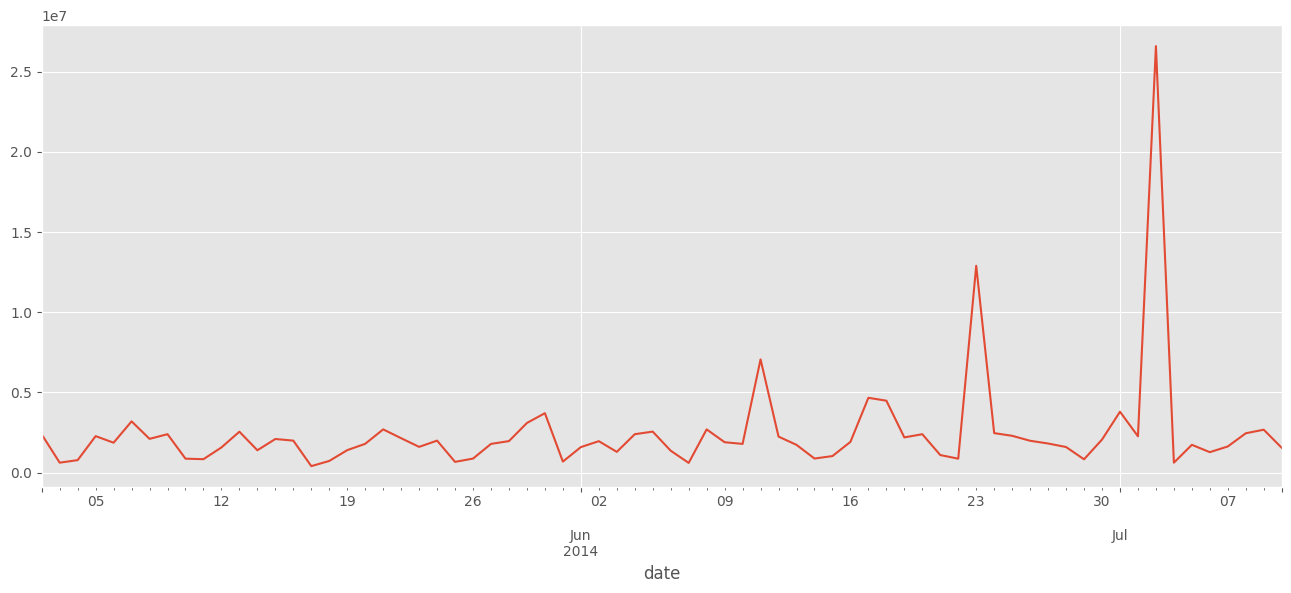

In [32]:
highest_price.plot(figsize=(16, 6))

### Step-3: Feature Understanding

### Plotting feature distribution
*   Histogram
*   KDE


*   BoxPlot





In [33]:
dataset.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,DayOfWeek
date,,,,,,,,,,,,,,,,,,
2014-07-09,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,Wednesday
2014-07-09,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,Wednesday
2014-07-09,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,Wednesday
2014-07-10,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,Thursday
2014-07-10,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA,Thursday


<Axes: xlabel='date'>

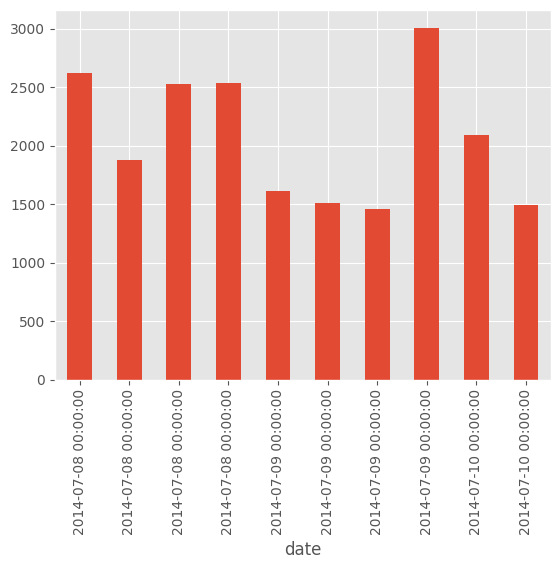

In [34]:
dataset['sqft_living'].tail(10).plot(kind='bar')

Text(0, 0.5, 'Count')

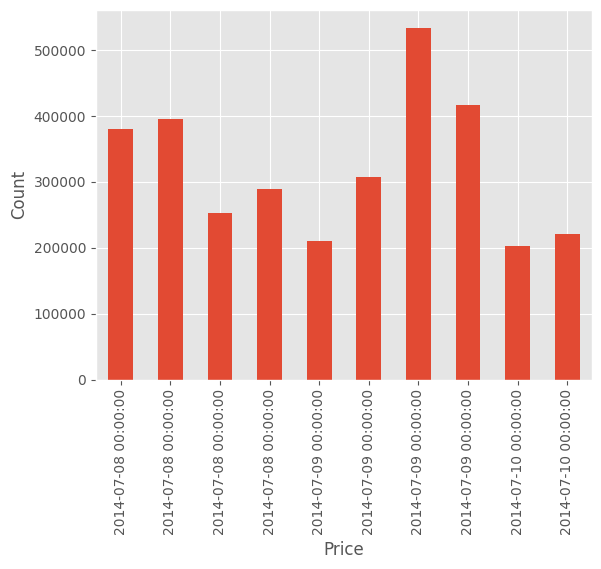

In [35]:
ax = dataset['price'].tail(10).plot(kind='bar')
ax.set_xlabel('Price')
ax.set_ylabel('Count')

<Axes: xlabel='date'>

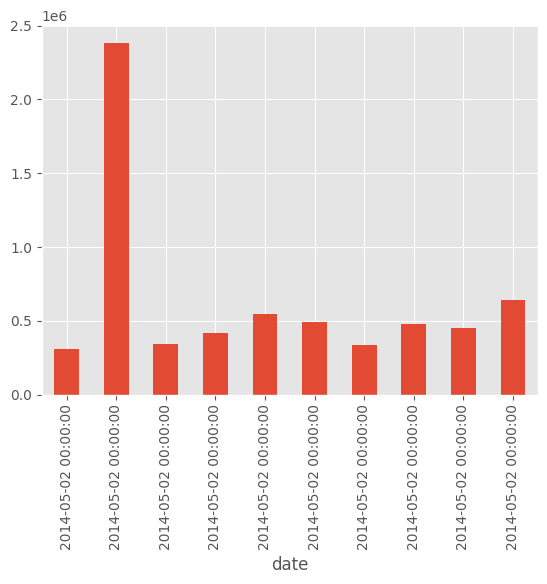

In [36]:
dataset['price'].head(10).plot(kind='bar')

<Axes: ylabel='Frequency'>

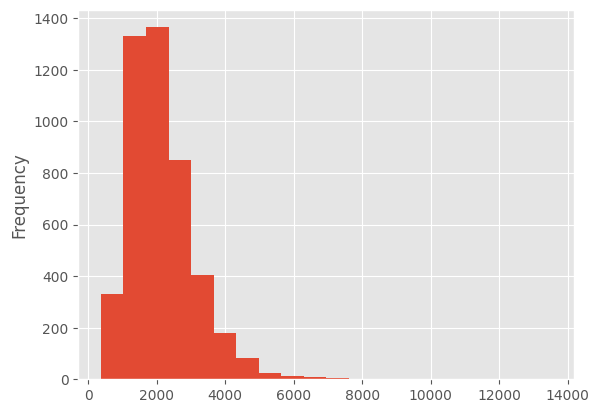

In [37]:
dataset['sqft_living'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

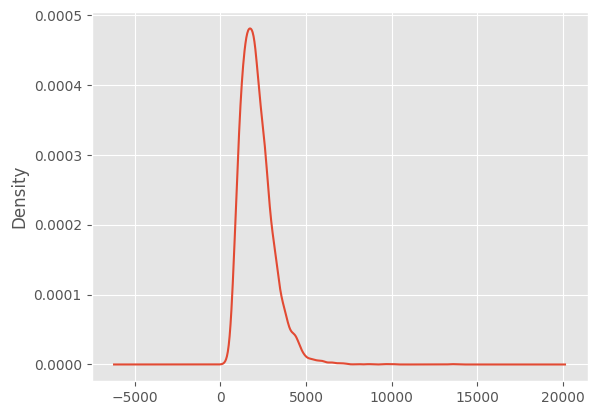

In [38]:
dataset['sqft_living'].plot(kind='kde')

### Step-3: Feature Relationships


*   Scatter plot
*   Heat map


*   Pair Plot
*   Groupby coparisons





In [39]:
dataset.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,DayOfWeek
date,,,,,,,,,,,,,,,,,,
2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,Friday
2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,Friday
2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,Friday
2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,Friday
2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,Friday


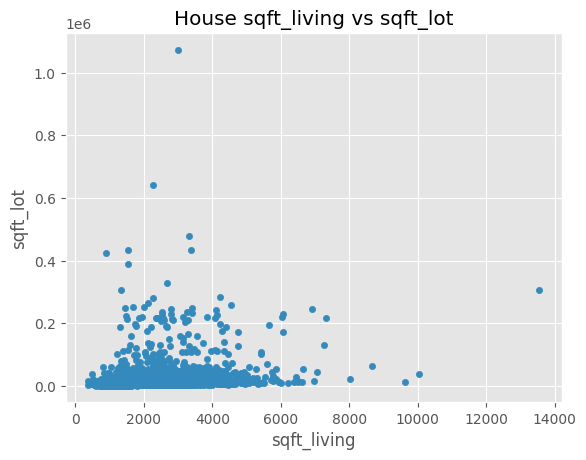

In [40]:
dataset.plot(kind='scatter', x='sqft_living',
             y='sqft_lot', title = 'House sqft_living vs sqft_lot')
plt.show()

<Axes: xlabel='sqft_living', ylabel='sqft_lot'>

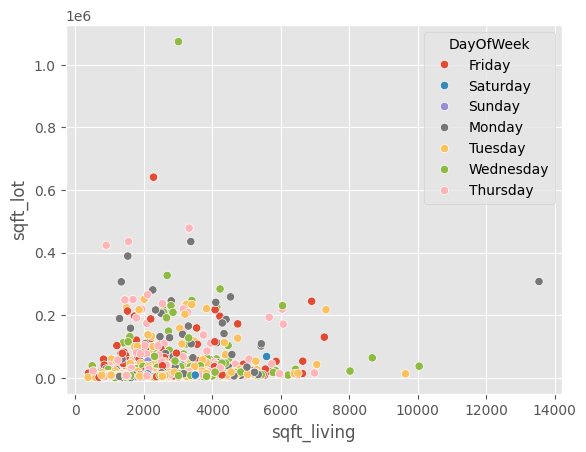

In [41]:
sns.scatterplot(x='sqft_living', y='sqft_lot', hue='DayOfWeek', data=dataset)

In [42]:
dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'DayOfWeek'],
      dtype='object')

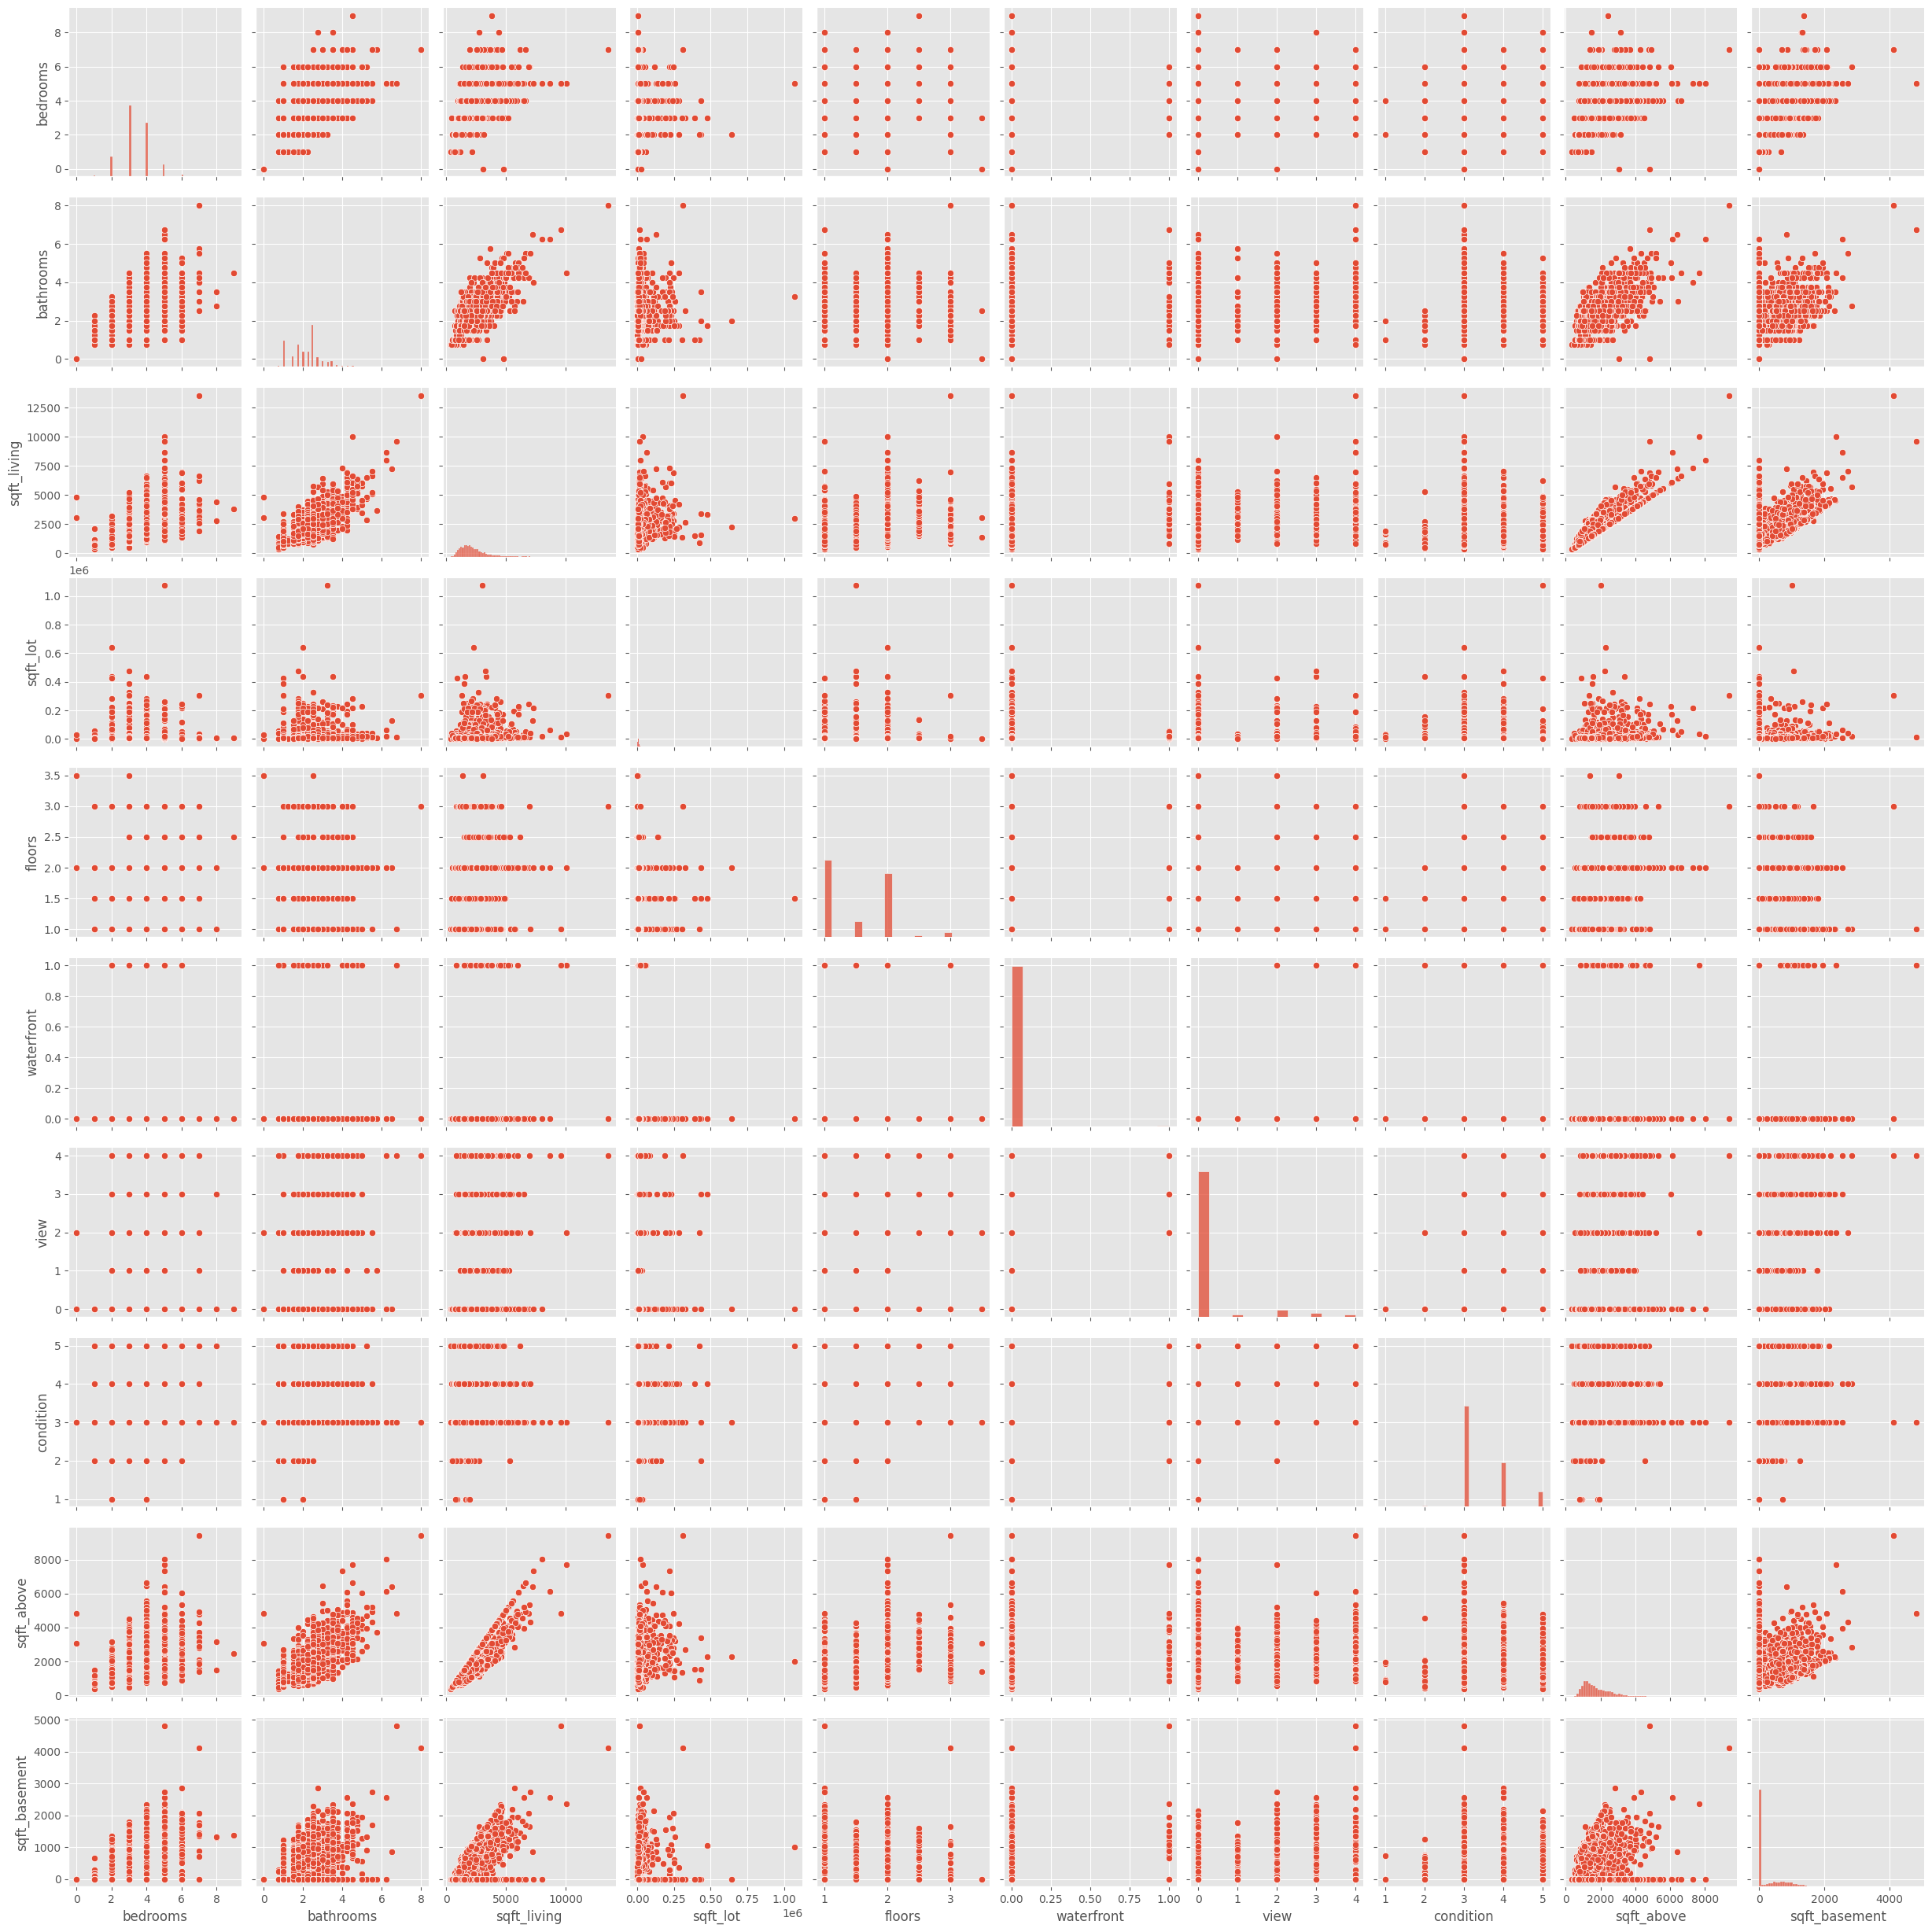

In [43]:
sns.pairplot(dataset, vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement'])
plt.show()

In [44]:
dataset.select_dtypes(include=['float64', 'int64']).columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [45]:
dataset_corr = dataset[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated']].corr()

In [46]:
dataset_corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
bedrooms,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426
sqft_basement,0.334165,0.298020,0.447206,0.034842,-0.255510,0.097501,0.321602,0.200632,-0.038723,1.000000,-0.161675,0.043125


<Axes: >

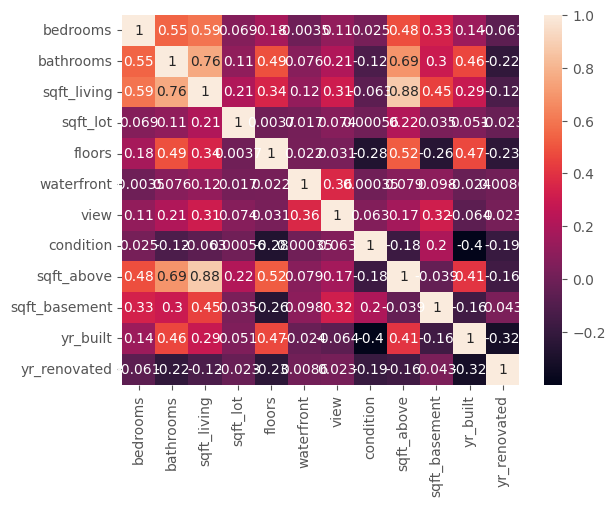

In [47]:
sns.heatmap(dataset_corr, annot=True)

#### Check Outliers

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

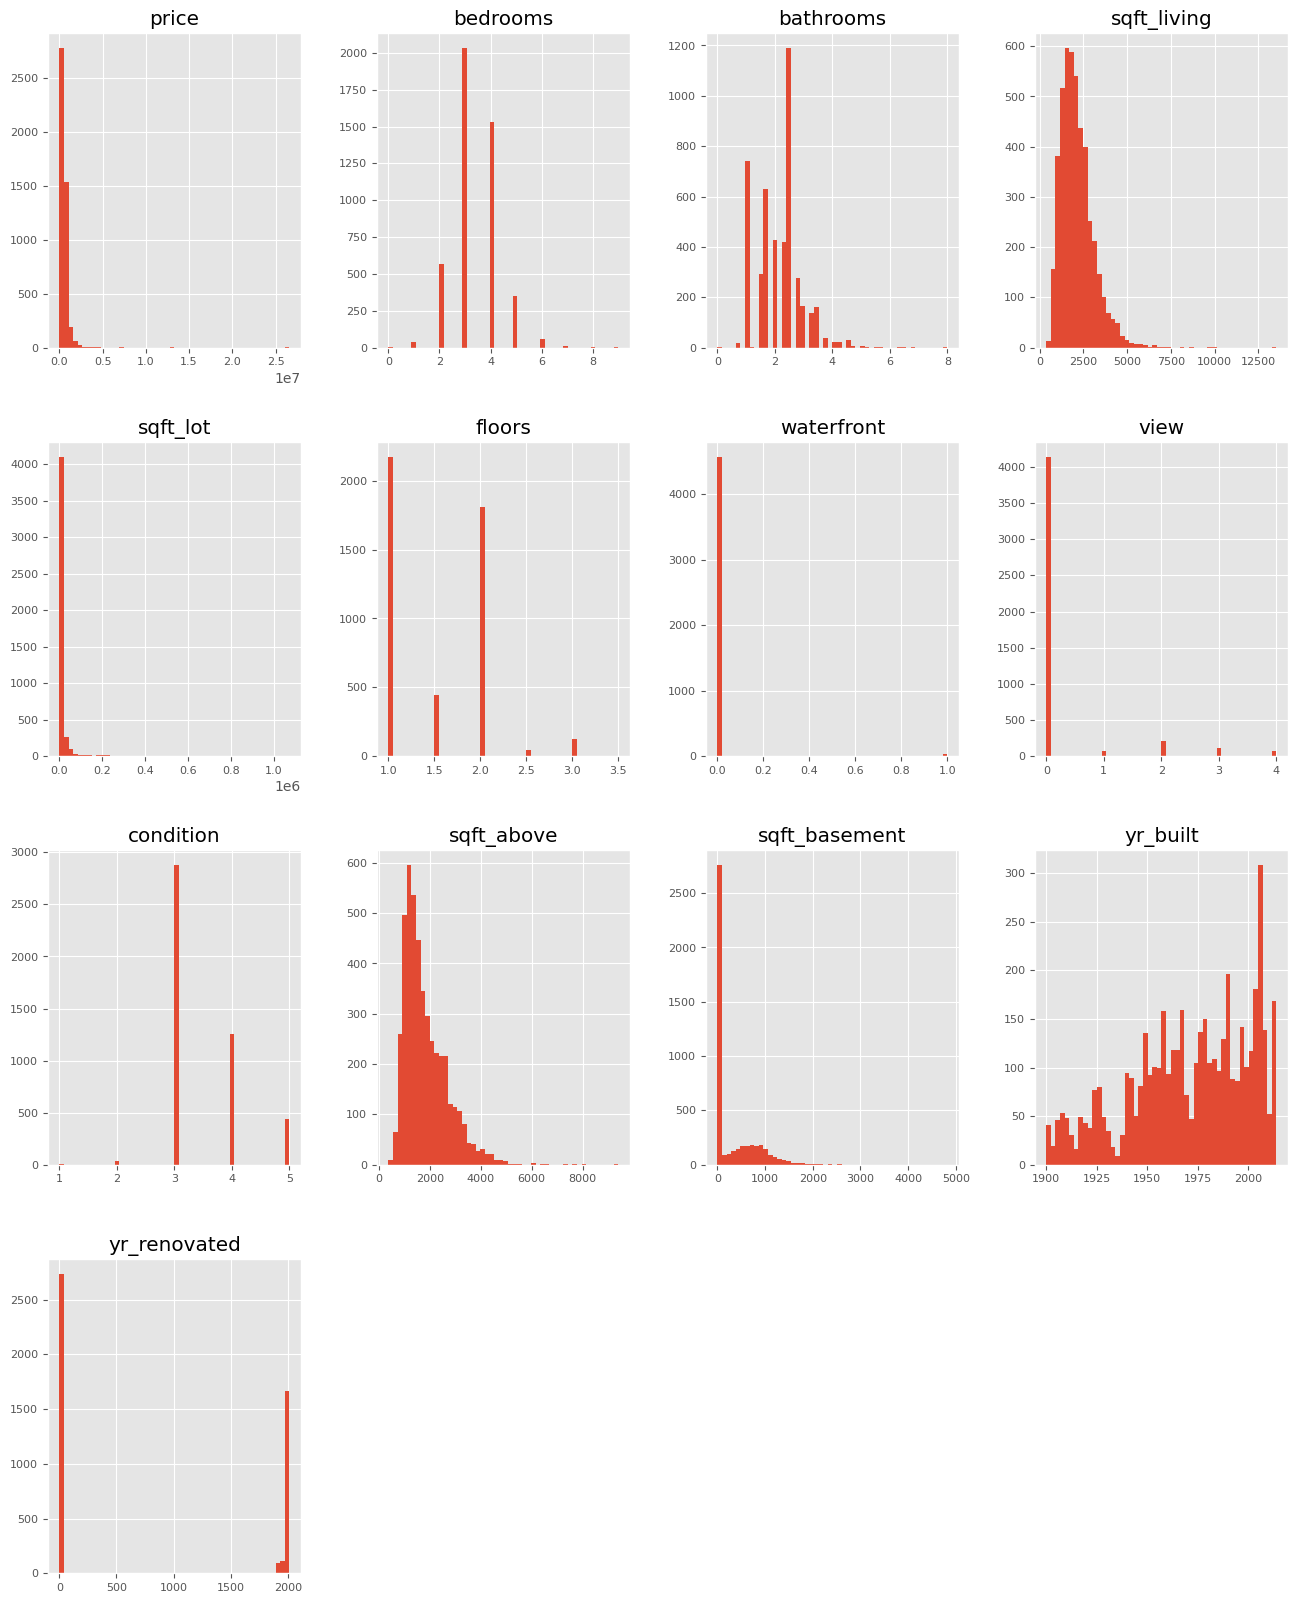

In [48]:
dataset.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [49]:
temp = dataset[dataset['sqft_living'] > 5000]

<Axes: xlabel='sqft_living', ylabel='price'>

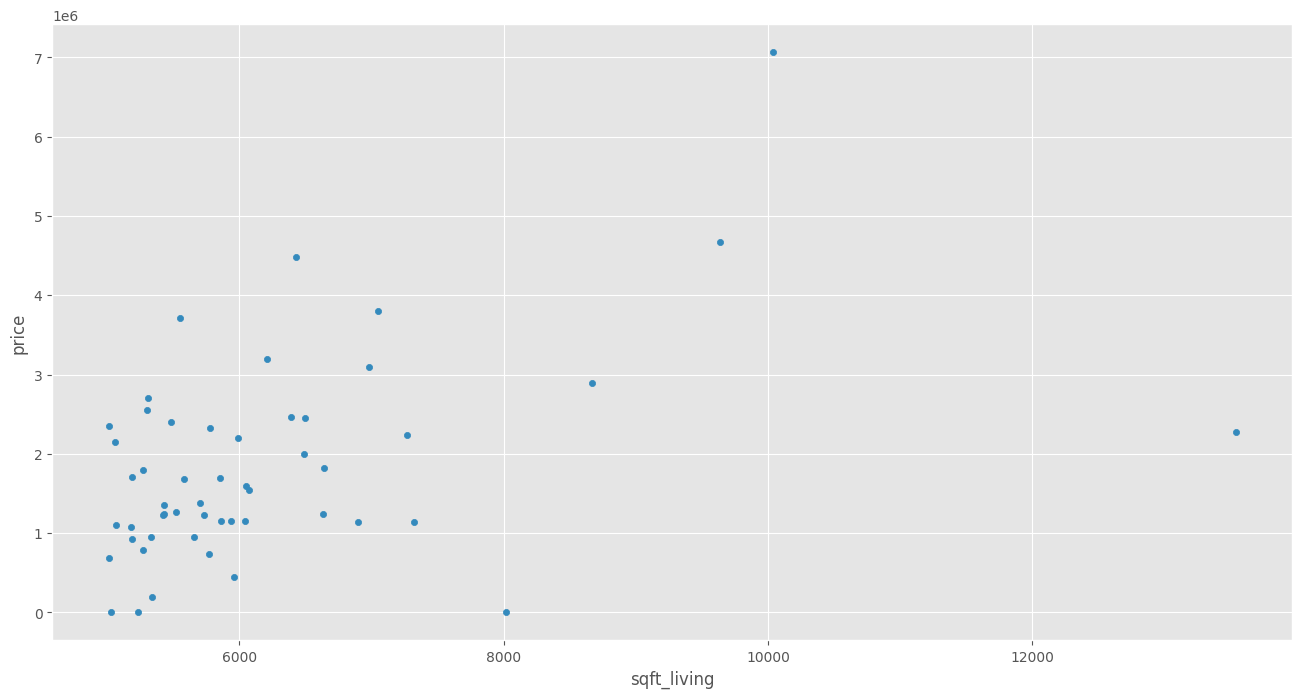

In [50]:
temp[['price', 'sqft_living']].plot(kind='scatter', x='sqft_living', y='price', figsize=(16, 8))

In [51]:
num_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

In [52]:
num_cols

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [53]:
max_threshold = []
min_threshold = []
for i in range(len(num_cols)):
  max_threshold.append(dataset[num_cols[i]].quantile(0.95))
  min_threshold.append(dataset[num_cols[i]].quantile(0.05))

In [54]:
for i in range(len(num_cols)):
  print(num_cols[i], ": max_threshold =  " , max_threshold[i], " and min_threshold = ", min_threshold[i])

price : max_threshold =   1184050.0000000002  and min_threshold =  200000.0
bedrooms : max_threshold =   5.0  and min_threshold =  2.0
bathrooms : max_threshold =   3.5  and min_threshold =  1.0
sqft_living : max_threshold =   3870.0  and min_threshold =  950.0
sqft_lot : max_threshold =   43560.0  and min_threshold =  1690.8000000000002
floors : max_threshold =   2.0  and min_threshold =  1.0
waterfront : max_threshold =   0.0  and min_threshold =  0.0
view : max_threshold =   2.0  and min_threshold =  0.0
condition : max_threshold =   5.0  and min_threshold =  3.0
sqft_above : max_threshold =   3440.0  and min_threshold =  860.0
sqft_basement : max_threshold =   1210.0  and min_threshold =  0.0
yr_built : max_threshold =   2009.0  and min_threshold =  1913.0
yr_renovated : max_threshold =   2011.0  and min_threshold =  0.0


### Step-4: Data Cleaning


##### Handel Categorical Features

In [106]:
cat_columns = dataset.select_dtypes(include=['object']).columns

In [107]:
cat_columns

Index(['street', 'city', 'statezip', 'country', 'DayOfWeek'], dtype='object')

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
label_encoder = LabelEncoder()

In [110]:
y = dataset[['price']]

In [111]:
y.shape

(4600, 1)

In [112]:
y

,price
date,
2014-05-02,3.130000e+05
2014-05-02,2.384000e+06
2014-05-02,3.420000e+05
2014-05-02,4.200000e+05
2014-05-02,5.500000e+05
...,...
2014-07-09,3.081667e+05
2014-07-09,5.343333e+05
2014-07-09,4.169042e+05


In [113]:
X = dataset.drop(['price'], axis=1)

In [114]:
X.shape

(4600, 17)

In [115]:
for col in cat_columns:
    X[col] = label_encoder.fit_transform(X[col])

In [116]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,DayOfWeek
date,,,,,,,,,,,,,,,,,
2014-05-02,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0,0
2014-05-02,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0,0
2014-05-02,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0,0
2014-05-02,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0,0
2014-05-02,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0,0


# Build Linear Regression Model

In [117]:
def cost_function(X, y, theta, b):
    """
      theta: (len(X), 1)
      X: (m, n) -> n is the number of features
      b: bias
      y: (m,1)

      output = cost function = J(theta, b) = (1/2m) sum(power(yhat - y, 2))
    """
    m = X.shape[0]
    cost = 0

    for i in range(m):
        f_wb = theta * X[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost
    return total_cost

In [118]:
import math

In [119]:
def compute_gradient(X, y, theta, b):
  """
   X: the given dataset
   y: the label
   theta: weights
   b: bias

  """
  m = X.shape[0]
  d_theta = 0
  d_b = 0

  for i in range(m):
    yhat = theta * X[i] + b
    d_theta_i = (yhat - y[i]) * X[i]
    d_b_i = yhat - y[i]
    d_theta += d_theta_i
    d_b += d_b_i

  d_theta = d_theta/m
  d_b = d_b/m

  return d_theta, d_b

In [148]:
def gradient_descent(X, y, theta, b, alpha, epochs, cost_function,  compute_gradient):

  """
   X: the given dataset
   y: the label
   theta: weights
   b: bias
   alpha: learning rate
   epochs: number of iterations

  """
  weights = []
  cost = []

  for i in range(epochs):

    d_theta, d_b = compute_gradient(X, y, theta, b)


    theta = theta - alpha * d_theta
    b = b - alpha * d_b


    if i<100000:      # prevent resource exhaustion
            cost.append( cost_function(X, y, theta , b) )
            weights.append([theta,b])

    #print(cost[-1][-1])
    if i% math.ceil(epochs/10) == 0:
            print("Iteration: ", i,  " Cost: ",  cost[-1][-1], " dj_dtheta: " ,
             d_theta, " dj_db: ", d_b, " theta: ", theta , " b: ", b)

  return theta, b, cost, weights

In [136]:
X = np.array(X)
y = np.array(y)

In [137]:
type(X), X.shape

(numpy.ndarray, (4600, 17))

In [138]:
type(y), y.shape

(numpy.ndarray, (4600, 1))

In [ ]:

w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(X ,y, w_init, b_init, tmp_alpha,
                                                    iterations,cost_function,  compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")